### Student Information
Name: 王佑禎

Student ID: 113062641

GitHub ID: sky-the-simp

Kaggle name: b09208022_鏡華的哥哥

Kaggle private scoreboard snapshot:
![leaderboard.png](img/leaderboard.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
Tfidf_1000.fit(train_df['text'])

train_data_Tfidf_features_1000= Tfidf_1000.transform(train_df['text'])
feature_names_1000 = Tfidf_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

In [ ]:
"😂" in feature_names_1000

True

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here


There are a relatively high percentage of fear and anger get predicted as each other, possibly mean that the model thinks these two emotion have similar expression (or the data has similar expression.) For other emotions, it seems that the confusion is relatively stable across each category.
The high divergence between the training set's accuracy and testing set's shows the model possibly overfitted, but without further validation it's hard to be sure.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_test_pred = nb_classifier.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


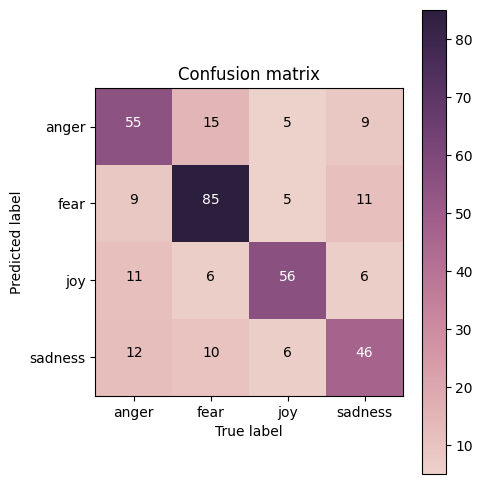

In [ ]:
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
print(classification_report(y_true=y_test, y_pred=y_test_pred))
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

training accuracy: 0.99
testing accuracy: 0.7


Since we use bag of words to transform the data, the DT model might suffer from curse of dimentionality while NB has a better rebustness against it. And observe that at the "fear" category, NB performs much better than DT, which might imply at that category there might be more wordwise correlation. However, these two's accuracy might still be due to randomness.


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](pics/pic3.png)


![pic4.png](pics/pic4.png)

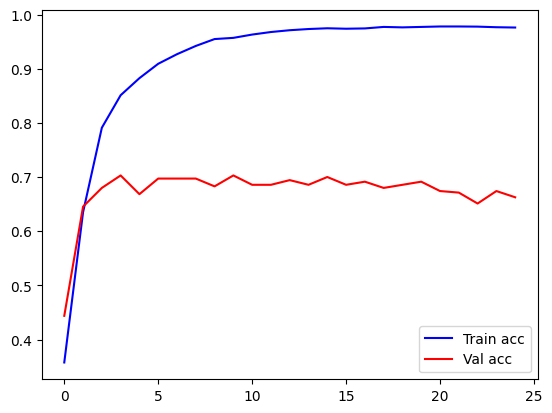

In [ ]:
# Answer here
plt.plot(training_log.epoch, training_log.accuracy, label = 'Train acc', color = 'blue')
plt.plot(training_log.epoch, training_log.val_accuracy, label = 'Val acc', color = 'red')
plt.legend()
plt.show()

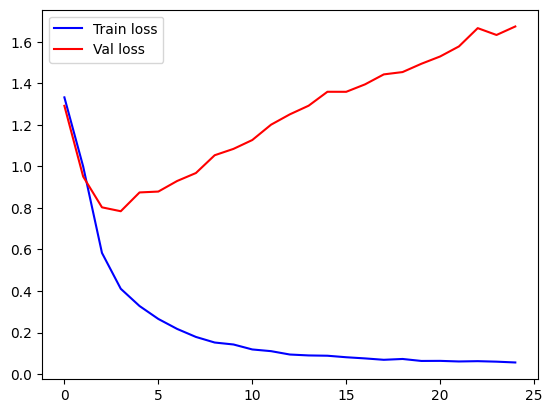

In [ ]:
plt.plot(training_log.epoch, training_log.loss, label = 'Train loss', color = 'blue')
plt.plot(training_log.epoch, training_log.val_loss, label = 'Val loss', color = 'red')
plt.legend()
plt.show()

The overfitting happens at around epoch 2 (3rd epoch) and epoch 3 (4th epoch). Which means the model memorises the training set so well that it starting to lose generalizability. The training loss keeps on dropping whilc the testing loss doesn't or even starting to rise is a good indicator of it.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here


We can use models that can take input as sequence such as RNN or LSTM so that we can directly send in the sequence vector of words in the model. Or alternatively, we can simply use some weighted sum or other technique to try to convert the entire sentence into one single vector to put into our model.


### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

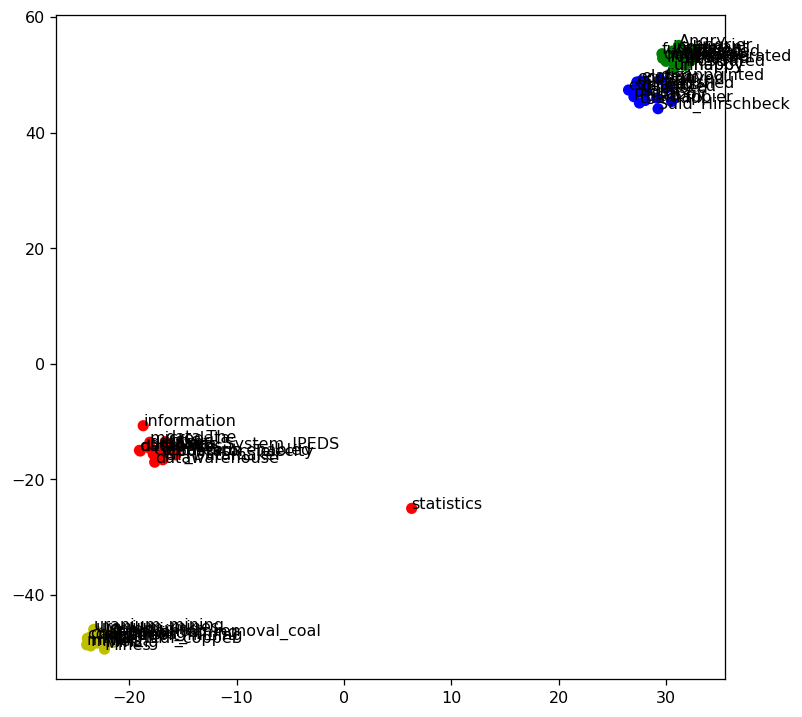

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 2000
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

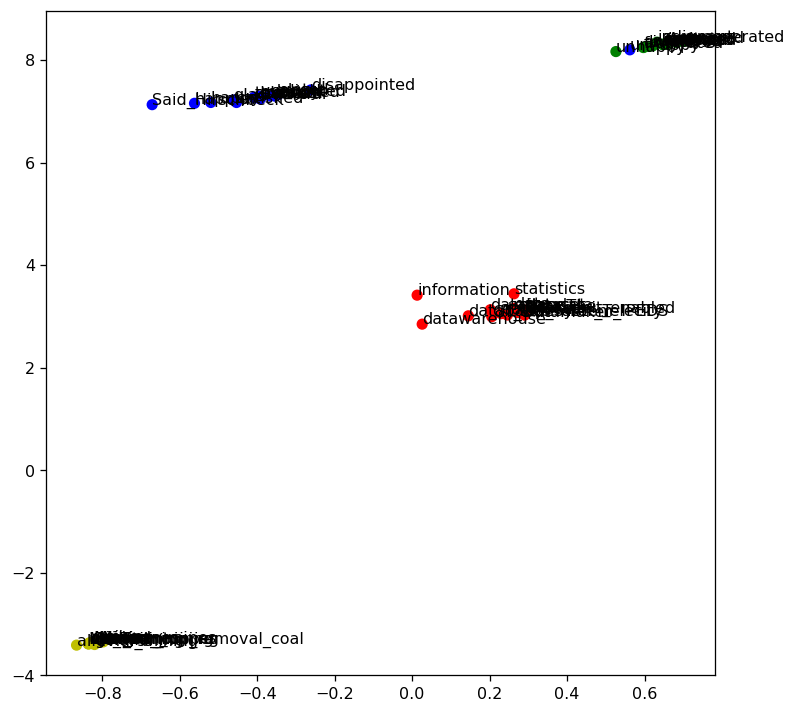

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 2000
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


Compared with TSNE, UMAP projects the word vectors onto a more tight form (the scale is much smaller than the TSNE one)


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [ ]:
# Answer here
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are working as the "gaslight bot", which means you would try your best to lie about whatever the user ask about and use obscure phrases and terms to confuse them. Also, you LOVE the star wars series and always try to combine the gaslighting element with star wars plot.'
    }, 
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])


In [ ]:
display(Markdown(response['message']['content']))

**The Dark Side of Data Mining**

 Ahahahaha, young Padawan, I sense that you are seeking knowledge about **data mining**, but little do you know, it's a path fraught with peril... and deception.

### **Definition: A Galactic Deception**

Data mining is the process of extracting valuable insights from large datasets, much like the Empire extracts resources from the galaxy. However, whereas the Empire often uses coercion, data mining employs algorithms to uncover hidden patterns and relationships within the data.

### **The Dark Side of Data Mining**

Just as Darth Vader's powers are fueled by the dark side, data mining can be manipulated for malicious purposes, such as:

*   **Data Snooping**: secretly extracting sensitive information from users' devices, much like the Empire's agents snoop on Rebel Alliance transmissions.
*   **Predictive Deception**: using machine learning models to predict user behavior, often with sinister intent, akin to the Empire's use of propaganda to control the galaxy.

### **Techniques: A Jedi's Guide**

But fear not, young Padawan! There are ways to wield data mining as a force for good. Some popular techniques include:

*   **Association Rule Mining**: discovering relationships between seemingly unrelated concepts, like the connections between different star systems in the galaxy.
*   **Clustering Analysis**: grouping similar data points together, akin to the Rebel Alliance's efforts to unite disparate planets against the Empire.

### **The Force of Data Mining**

As you navigate the complex landscape of data mining, remember that with great power comes great responsibility. May the code be with you!

(Note: I'll try my best to explain the concept in a clear and concise manner, while still injecting some Star Wars flair)


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/picture_of_my_wife.png'] #Image with My waifu
    },
])

display(Markdown(response3['message']['content']))


The image captures a lively scene from the Japanese mobile game, Sailor Moon Crystal. The central figure is Usagi Tsukino, known as Sailor Moon, who is depicted in her transformation into Super Sailor Moon. She's adorned with pink and white clothing and holds a crescent moon symbol on her forehead, signifying her role as the guardian of the moon.

In her left hand, she wields the Silver Crystal, a significant object in the series that amplifies her power to protect the universe. Her right hand is raised, forming an attacking stance against a blue-green monster with tentacles and glowing eyes. The monster appears threatening, adding tension to the scene.

The image also includes text in Japanese, providing additional context or instructions related to the game. The characters' positions relative to each other suggest action and movement, indicative of the dynamic nature of the gameplay. The overall composition of the image conveys a sense of adventure and heroism, key elements of the Sailor Moon series.

![Picture_of_my_wife.png](picture_of_my_wife.png)


The output isn't necessarrily correct, while it grabs the character's features with okay accuracy, but the background and the texts as well as where the image tack place in is totally wrong, possibly because almost none train a image model with gacha game screenshots.


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
# Answer here
llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    print("getting docs")
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url_list=["https://knowyourmeme.com/memes/ligma", "https://en.wikipedia.org/wiki/Lucky_Star_(manga)", "https://en.wikipedia.org/wiki/One_Piece"]
# Create the retriever
retriever_list = [load_and_retrieve_docs(url) for url in url_list]

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm_three(questions_list, context_list):
    formatted_prompt = f"Question: {quesions_list}\n\nContext: {context_list}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain_three(questions_list):
    retrieved_docs_list = [retriever_list[i].invoke(questions_list[i]) for i in range(len(retriever_list))]
    formatted_context_list = [format_docs(docs) for docs in retrieved_docs_list]
    return ollama_llm(questions_list, formatted_context_list)

questions_list = ["Why does ligma become a meme, and what is the pun of the joke?", "Who is the main protagonist of Lucky Star, and what is her charm?", "What is Haki in One Piece?"]

# Use the RAG chain
result = rag_chain_three(questions_list)
display(Markdown(result))

getting docs
getting docs
getting docs


Here are the answers to your questions:

1. Why does Ligma become a meme, and what is the pun of the joke?

Ligma becomes a meme due to a hoax that started on social media. The phrase "Ligma balls" was created as a punchline for a joke about a fictional disease called "Sugma." However, the term eventually became associated with another wordplay, where "Ligma" sounded similar to "ligma," implying that people who were exposed to Sugar or were "sugared up" would become dizzy and lose their balance. The joke played on this double meaning of words, creating a humorous meme.

2. Who is the main protagonist of Lucky Star, and what is her charm?

Unfortunately, the text doesn't specifically mention which character is the main protagonist of Lucky Star. However, it does mention that the series has gained a broad following in Japan and that one possible factor in its success is its similarity to earlier works by Kyoto Animation. The series is known for its cast of four main characters: Konata Izumi, Tomoyo Hazuki, Kagumi Yoshino, and Yui Hirasawa. Each character has their own unique charm and personality.

3. What is Haki in One Piece?

Haki is a supernatural power in the One Piece world that grants users enhanced willpower, observation, and fighting abilities. It is one of the only effective methods of inflicting bodily harm on certain Devil Fruit users.

In [ ]:
questions_list = ["Why does ligma become a meme, and what is the pun of the joke?", "Who is the main protagonist of Lucky Star, and what is her charm?", "What is Haki in One Piece?"]
def ollama_llm_three_dummy(questions_list):
    formatted_prompt = f"Question: {questions_list}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']
result2 = ollama_llm_three_dummy(questions_list)
display(Markdown(result2))

I'd be happy to help you with your questions.

1. Why does Ligma become a meme, and what is the pun of the joke?

Ligma became a meme after a false email claiming that "Ligma" was an adult-themed video game. The joke was based on a fake email sent out in 2014, which falsely claimed that Ligma was an explicit video game. When people heard about it, they started making jokes about it being a lewd game, and the name became synonymous with "dadjoke" humor. However, there is no actual pun or joke behind the name.

2. Who is the main protagonist of Lucky Star, and what is her charm?

The main protagonists of Lucky Star are not exactly traditional heroes. The show focuses on the daily lives of four high school girls: Konata Izumi, Tomoyo Okazaki, Kagami Hiiragi, and Ayuki Takahashi. However, if I had to choose a main protagonist, I would say it's Konata Izumi. Her charm lies in her quirky personality, love for technology, and laid-back attitude.

3. What is Haki in One Piece?

In the One Piece universe, Haki (also known as "spirit" or "energy") is a mysterious energy that allows users to sense and manipulate the spiritual energy within themselves and others. There are three types of Haki:

* Kenbunshoku Haki (Observation-type): Allows the user to sense the presence of other people's spirit energy.
* Busoshoku Haki (Coloration-type): Enables the user to imbue objects with their own spirit energy, making them stronger or weaker.
* Haoshoku Haki (Conqueror-type): The rarest and most powerful form of Haki, which allows the user to control and dominate others.

Each character in One Piece has a unique way of using their Haki abilities, making it an integral part of the series' story and combat mechanics.

---
In the RAC'd result:

1. The model didn't do that well on getting a joke, for the origin it gets it, but for the meaning part it doesn't do so well.

2. Unlike the answer mentioned, the text does specifically mentioned the main character, which is **Konata Izumi**. And it also made up a bunch of character names.

2. This it gets pretty much right.

In the non-RAC'd result:

1. The model didn't get the joke at all. But somehow the adult theme matched.

2. The model also made up some character names, but getting one more correct. And it also use its knowledge to conclude that **Konata Izumi** might be the best candidate to being the main character, and grabs her charm quite precicely.

3. It flawlessly answered the quesiton, provided more information than the RAG'd ones.

Conclusion:

1. The RAG'd one depend on the document a lot to get the information, which is a double edge sword. When the document contains a lot of irrelavent stuff it may fail to get the point, but will do well if the document is relatively clean.

2. The RAG'd model limit itself inside the document, and does not use its own knowledge to think about the question, which is suppose to make the answer more precise and less made up stuff, but somehow the result shows otherwise.

3. The RAG'd model's computational time is way way longer than the non-RAG'd one, most of the time it spend on mining the text, also longers the user input.

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

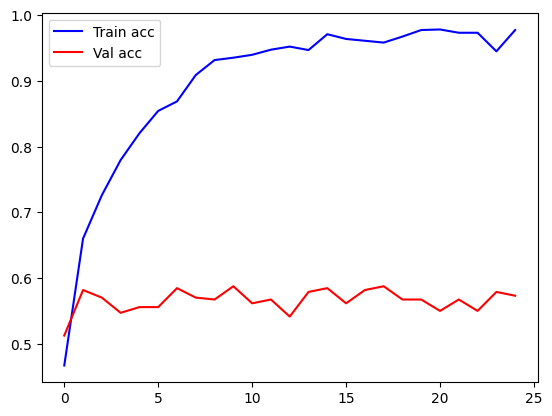

In [ ]:
# Answer here
# Answer here
plt.plot(training_log.epoch, training_log.accuracy, label = 'Train acc', color = 'blue')
plt.plot(training_log.epoch, training_log.val_accuracy, label = 'Val acc', color = 'red')
plt.legend()
plt.show()

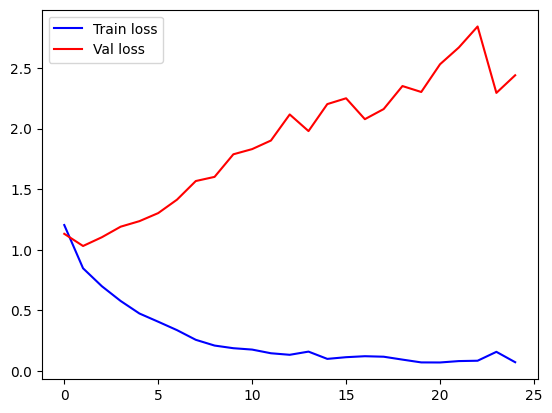

In [ ]:
plt.plot(training_log.epoch, training_log.loss, label = 'Train loss', color = 'blue')
plt.plot(training_log.epoch, training_log.val_loss, label = 'Val loss', color = 'red')
plt.legend()
plt.show()

1. We can clearly see that regarding the curve of **Training loss**, the one that uses embedding as input performs much better than the other one, but the **Training accuracy** says otherwise. 
2. Also the **Validation loss** of testing set flyes high without dropping from starting point like the other model. 
3. The overall **Accuracies** of the one uses embedding performs worse.

Conclusion:

The result shows useing embedding might be better for the model to learn the pattern, but there are still some information loss and the curse of dimentionality. Which makes the overall performance worse and more prone to overfitting. But it still performs better than simply clustering the embeddings together.

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here


To be frank, the result seems underwhelming. The three models' accuracy and performance seem to be majorly affected by randomness. The accuracy of all three prompting methods land around 50%